## ADHS DATENSATZ

- Nicht die Datenwerte normalisieren sondern "MNI Space" verwenden. Hierzu Foto auf Handy.  

- Sind die Atlanten überhautp anwendbar auf Kinder?

(91, 109, 91, 1200)
(160, 240, 256)
(64, 64, 36, 78)
(64, 64, 36, 78)


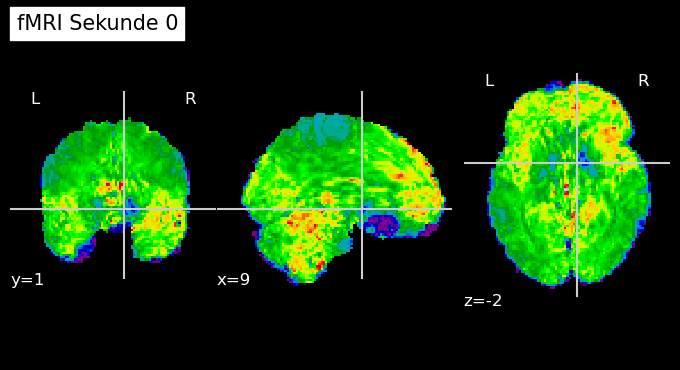

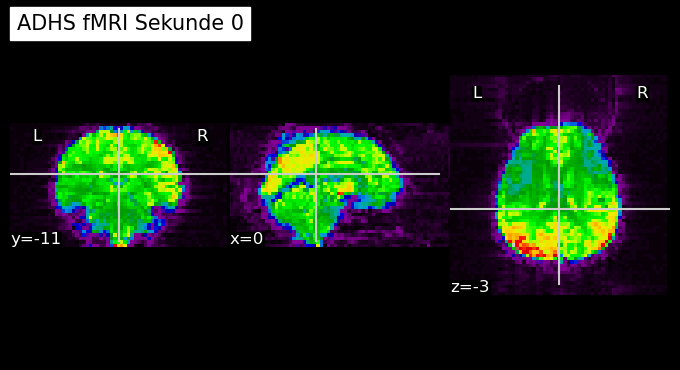

In [2]:
# Bibliotheken importieren
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nibabel as nib  # Für das Lesen von fMRI-Daten
from nilearn import datasets, image, plotting  # Für die Visualisierung der Gehirnaktivität
from nilearn.connectome import ConnectivityMeasure  # Für die Berechnung der Functional Connectomes
import nibabel as nib


# Lade die fMRI-Daten
file_path = "/Users/thomaspfaffinger/Coding/BrainActivity/Datensatz/Vorb_Datensatz/F/100307/rfMRI_REST1_LR_hp2000_clean.nii"  # "Pfad_zur_Datei/fMRI_Daten.nii.gz"
fmri_img = nib.load(file_path)

# Laden der fMRI-ADHS-Daten
file_path_adhs_T1w = "/Users/thomaspfaffinger/Coding/BrainActivity/Datensatz_ADHS/Vorbereitet/sub-1084283_ses-1_run-1_T1w.nii"
file_path_adhs_bold = "/Users/thomaspfaffinger/Coding/BrainActivity/Datensatz_ADHS/Vorbereitet/sub-1084283_ses-1_task-rest_run-1_bold.nii"
fmri_img_adhs_t1w = nib.load(file_path_adhs_T1w)
fmri_img_adhs2_bold = nib.load(file_path_adhs_bold)
fmri_img_adhs2_bold_nifti1 = nib.nifti1.load(file_path_adhs_bold)

print(fmri_img.shape)
print(fmri_img_adhs_t1w.shape)
print(fmri_img_adhs2_bold.shape)
print(fmri_img_adhs2_bold_nifti1.shape)

# Plotten der ursprünglichen fMRI-Daten
plotting.plot_epi(fmri_img.slicer[:, :, :, 0], title='fMRI Sekunde 0')

# Plotten der ADHS-fMRI-Daten
#plotting.plot_epi(fmri_img_adhs_t1w.slicer[:, :, :, 0], title='fMRI Sekunde 0')
plotting.plot_epi(fmri_img_adhs2_bold.slicer[:, :, :, 0], title='ADHS fMRI Sekunde 0')

In [4]:
import os
import nibabel as nib
from nilearn import image, plotting

# Verzeichnis und Pfad zu Ihren lokalen Dateien
template_path = "/Users/thomaspfaffinger/Coding/BrainActivity/mni_icbm152_nlin_asym_09b_nifti/mni_icbm152_nlin_asym_09b/mni_icbm152_t2_tal_nlin_asym_09b_hires.nii"
harvard_aan_atlas_path = "/Users/thomaspfaffinger/Coding/BrainActivity/doi_10_5061_dryad_zw3r228d2__v20230718/AAN_Brainstem_MNI152_1mm_v2p0.nii"
file_path_adhs_bold = "/Users/thomaspfaffinger/Coding/BrainActivity/Datensatz_ADHS/Vorbereitet/sub-1084283_ses-1_task-rest_run-1_bold.nii"

# Laden der neuen fMRI-Daten
fmri_img_adhs2_bold = nib.load(file_path_adhs_bold)

# Laden des MNI 2009b NLIN asymmetric T2 Templates
mni_template = nib.load(template_path)

# Resample die fMRI-Daten in den MNI-Raum
fmri_img_mni = image.resample_to_img(fmri_img_adhs2_bold, mni_template)

/Applications/anaconda3/envs/BrainActivity/lib/python3.11/site-packages/nilearn/image/resampling.py:756: UserWarning: Casting data from int16 to float32
  return resample_img(


In [5]:
print(fmri_img_mni.shape)

(394, 466, 378, 78)


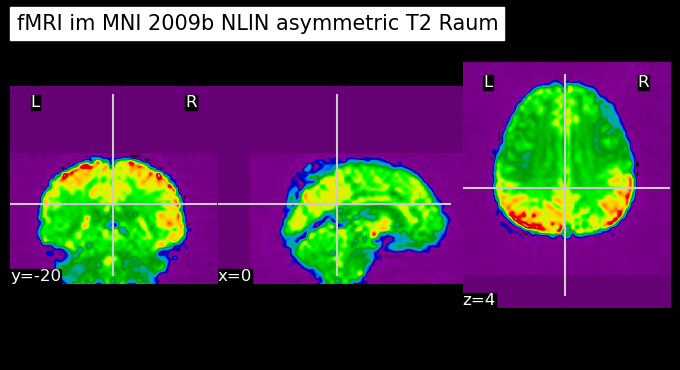

In [6]:
# Überprüfen der resampleten fMRI-Daten im MNI-Raum
plotting.plot_epi(fmri_img_mni.slicer[:,:,:,40], title='fMRI im MNI 2009b NLIN asymmetric T2 Raum')
plotting.show()

(182, 218, 182)


/Applications/anaconda3/envs/BrainActivity/lib/python3.11/site-packages/nilearn/image/resampling.py:492: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn(


(394, 466, 378)


DimensionError: Input data has incompatible dimensionality: Expected dimension is 4D and you provided a 3D image. See https://nilearn.github.io/stable/manipulating_images/input_output.html.

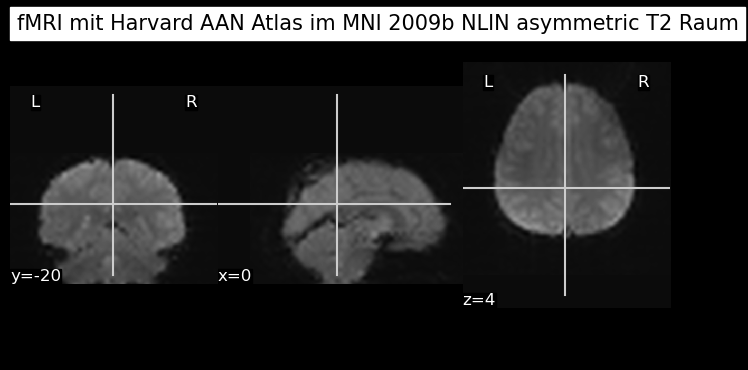

In [10]:
# Laden des Harvard AAN Atlas
harvard_aan_atlas = nib.load(harvard_aan_atlas_path)

print(harvard_aan_atlas.shape)

# Resample den Harvard AAN Atlas, um mit den fMRI-Daten übereinzustimmen
resampled_harvard_aan_atlas = image.resample_to_img(harvard_aan_atlas, fmri_img_mni, interpolation='nearest')

print(resampled_harvard_aan_atlas.shape)


# Visualisieren des Harvard AAN Atlas auf den fMRI-Daten im MNI-Raum
plotting.plot_prob_atlas(harvard_aan_atlas, bg_img=fmri_img_mni.slicer[:,:,:,40], title='fMRI mit Harvard AAN Atlas im MNI 2009b NLIN asymmetric T2 Raum')
plotting.show()

In [ ]:
# Resample den Harvard AAN Atlas, um mit den fMRI-Daten übereinzustimmen
resampled_harvard_aan_atlas = image.resample_to_img(harvard_aan_atlas, fmri_img_mni, interpolation='nearest')

# Visualisieren des Harvard AAN Atlas auf den fMRI-Daten im MNI-Raum
plotting.plot_prob_atlas(resampled_harvard_aan_atlas, bg_img=fmri_img_mni.slicer[:, :, :, 40], title='fMRI mit Harvard AAN Atlas im MNI 2009b NLIN asymmetric T2 Raum')
plotting.show()

- ..._atlas.maps verwenden?


- Pfad zu Atlas und MNI-Space
- Skript anwenden..


"Man muss die Daten skallieren, Atlas ist eigentlich egal. Normalisiert sollten die Daten schon sein."

/Users/thomaspfaffinger/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii


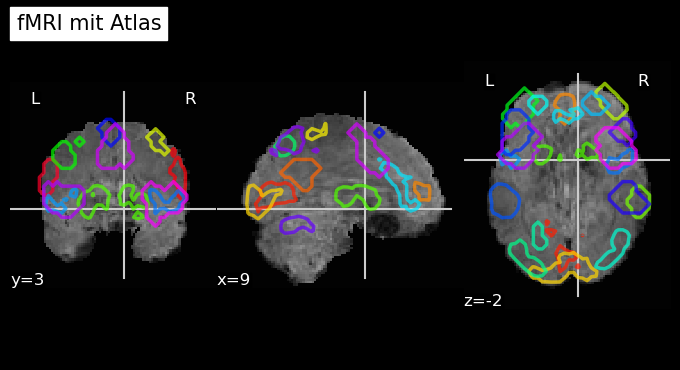

In [15]:
#Pipeline Leo für "msdl_atlas":

Nifti_img = nib.nifti1.load(file_path)

from nilearn import datasets
msdl_atlas = datasets.fetch_atlas_msdl(data_dir= None)
msdl_coords = msdl_atlas.region_coords
anzahl_regions = len(msdl_coords)

plotting.plot_prob_atlas(msdl_atlas.maps, bg_img=Nifti_img.slicer[:, :, :, 120], title='fMRI mit Atlas')

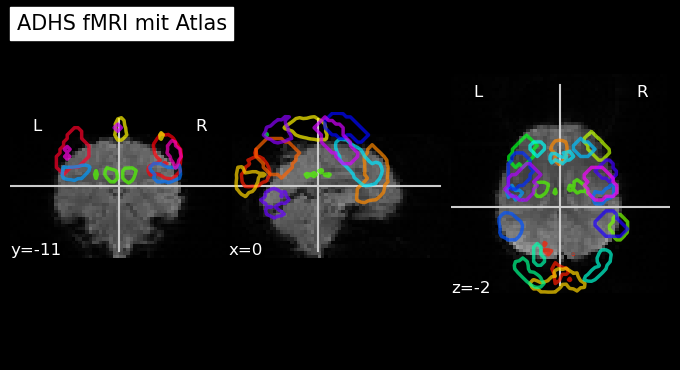

In [3]:
#Laden der ADHS-Daten

# Unterschied zwischen nifti1 und ohne???
#Nifti_img_adhs = nib.nifti1.load(file_path_adhs_bold)
fmri_img_adhs2_bold = nib.load(file_path_adhs_bold)


msdl_atlas = datasets.fetch_atlas_msdl(data_dir= None)
msdl_coords = msdl_atlas.region_coords
anzahl_regions = len(msdl_coords)

plotting.plot_prob_atlas(msdl_atlas.maps, bg_img=fmri_img_adhs2_bold.slicer[:, :, :, 40], title='ADHS fMRI mit Atlas')

/Applications/anaconda3/envs/BrainActivity/lib/python3.11/site-packages/nilearn/image/resampling.py:756: UserWarning: Casting data from int16 to float32
  return resample_img(


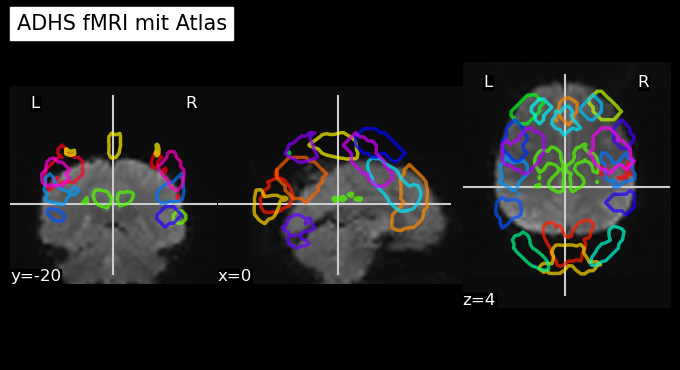

In [6]:
import nibabel as nib
from nilearn import datasets, image, plotting

# MNI-Template laden
mni_template = datasets.load_mni152_template()

# Resample die fMRI-Daten in den MNI-Raum
fmri_img_mni = image.resample_to_img(fmri_img_adhs2_bold, mni_template)


In [ ]:
from nilearn import datasets, image
niimg = datasets.load_mni152_template()
# Find the MNI coordinates of the voxel (50, 50, 50)
image.coord_transform(50, 50, 50, niimg.affine)

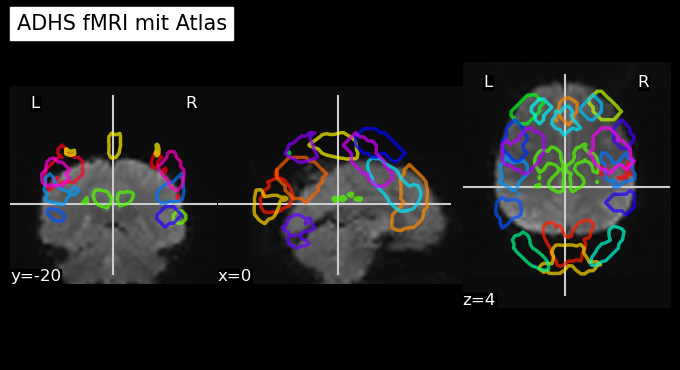

(197, 233, 189, 78)


In [7]:
# Überprüfen der resampleten fMRI-Daten im MNI-Raum
plotting.plot_prob_atlas(msdl_atlas.maps, bg_img=fmri_img_mni.slicer[:, :, :, 40], title='ADHS fMRI mit Atlas')
#plotting.plot_epi(fmri_img_mni, title='fMRI im MNI-Raum')
plotting.show()

print(fmri_img_mni.shape)

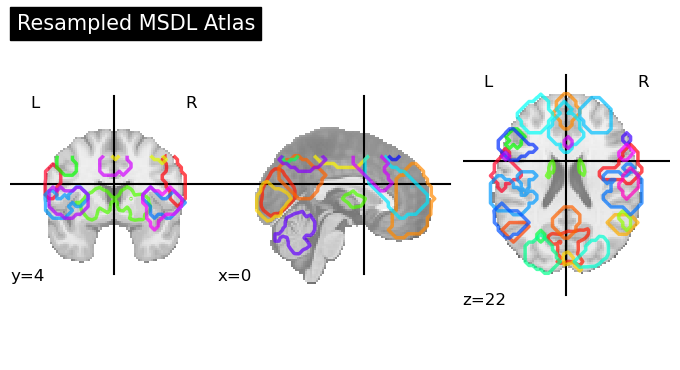

In [18]:
#Pipeline für "msdl_atlas" transformation:


# MSDL Atlas laden
msdl_atlas_dataset = datasets.fetch_atlas_msdl()
msdl_atlas_filename = msdl_atlas_dataset['maps']

# MSDL Atlas laden
msdl_atlas = nib.load(msdl_atlas_filename)


# Resample den Atlas auf die fMRI-Daten
resampled_msdl_atlas = image.resample_to_img(msdl_atlas, fmri_img_adhs2_bold, interpolation='nearest')

# Visualisieren des resampleten Atlas
plotting.plot_prob_atlas(resampled_msdl_atlas, title='Resampled MSDL Atlas')



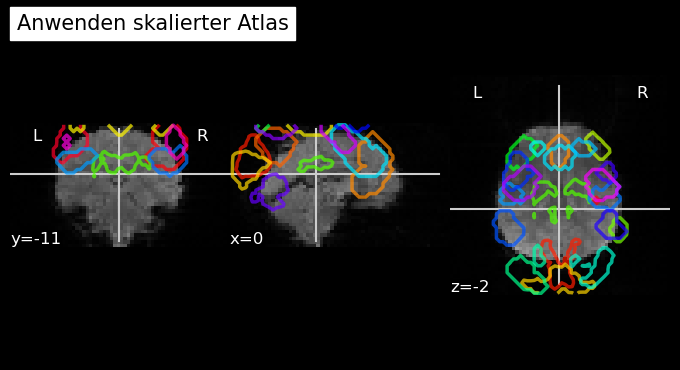

In [20]:
# Anwenden des skalierten Atlas auf die ADHS-Daten
plotting.plot_prob_atlas(resampled_msdl_atlas, bg_img=fmri_img_adhs2_bold.slicer[:, :, :, 40], title='Anwenden skalierter Atlas')